<a href="https://colab.research.google.com/github/katarinagresova/M7DataSP_2020/blob/erik_fscore/assignment_02/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data TODOs:
- ~~choose dataset~~
- ~~set way of loading data to this notebook~~  *Erik*

# Preprocessing TODOs:
- ~~check missing values~~ (there are none)
- ~~do one-hot encoding~~ (binned quality into bad and good)
- (optional: more preprocessing (would like to do outlier detection, if there will be time) )
- ~~split label~~
- ~~split train and test~~

# Model training TODOs:
- ~~create normalizer~~
- ~~define neural network~~
- ~~train neural network~~
- ~~plot the evolution of loss and/or accuracy as a number of epoch increases~~

#Evaluating TODOs
-~~ evaluate model on test data~~

# More layers TODOs

- ~~create a neural network with more layers~~
- ~~compare the two based on some measure~~
-~~plot the loss function instead of accuracy(accuracy is not a good measure when the classes are imballanced)~
- ~~maybe think of other measure such as precision, or f score~~

## Eriks personal TODOs
- ask how to use pipeline std scaler in neural networks
-ask what how to proceed with unballanced classes
- ask input_shape ? 
- ask adam(0.001)

# Data import

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing
from keras import backend as K




In [3]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [4]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Note that there is no cathegorical variable so there is no need to OneHotEncode.

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Data preprocessing

As we can see, all our data is numerical. Let's check, if there are some missing values.

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We are in luck my friend, there are no missing values. Let's change label - `quality` - in only two categories 'bad' and 'good' it makes it easier for classification. We split the label with median of quality (6) being border withween class labels

In [7]:
wine['quality'] = pd.cut(wine['quality'], bins = [0, 6, 8], labels = ['bad', 'good'])

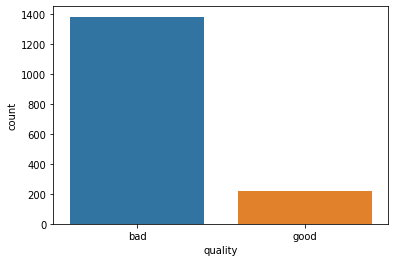

In [8]:
sns.countplot(x='quality', data = wine)

As we can see, the classes are unbalanced. Is the accuracy a good measure of our model?

And now some data splitting. First split data into train and test and then separate label column from data.

In [36]:
train_dataset = wine.sample(frac=0.8, random_state=42)
test_dataset = wine.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

label = 'quality'
train_labels = train_features.pop(label)== 'good'
test_labels = test_features.pop(label)== 'good'


Print some shapes to see if we did good.

In [37]:
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((1279, 11), (320, 11), (1279,), (320,))

In order to use Neural network algorithm, we need to standardize the data to zero mean and unit variance.


In [38]:
normalizer = preprocessing.Normalization()  #treba tam aj to imput shape?
normalizer.adapt(np.array(train_features))

In [39]:
'''normalizer = Pipeline(
    [('std_scaler', StandardScaler())]
)
x_train = normalizer.fit_transform(train_features)
x_test = normalizer.fit_transform(test_features)
'''
# toto ma zaujima, preco tento normalizer nefunguje
# a ako to upravit aby to v sequential funogvalo

"normalizer = Pipeline(\n    [('std_scaler', StandardScaler())]\n)\nx_train = normalizer.fit_transform(train_features)\nx_test = normalizer.fit_transform(test_features)\n"

#Neural Network
## One neuron model

Firstly, we create only one neuron, one layer model.

In [40]:
first_model = tf.keras.Sequential([
        normalizer,
        layers.Dense(units=1)
])

first_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 12        
Total params: 35
Trainable params: 12
Non-trainable params: 23
_________________________________________________________________


In [41]:
first_model.compile(loss='binary_crossentropy',
                    optimizer =tf.keras.optimizers.Adam(0.001), metrics =['accuracy'] )
# do optimizer staci len 'adam' ?

In [42]:
%%time
history = first_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 5.24 s, sys: 327 ms, total: 5.57 s
Wall time: 4.45 s


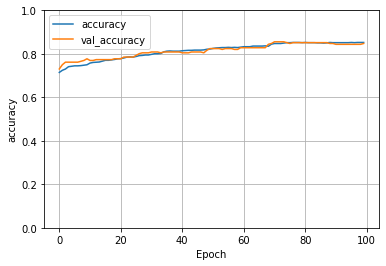

In [43]:
def plot_loss(history, measure = 'accuracy', valmeasure = 'val_accuracy'):
  plt.plot(history.history[measure], label=measure)
  plt.plot(history.history[valmeasure], label=valmeasure)
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel(measure)
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [44]:

# evaluation on test data
test_evaluation = {}
test_evaluation['first_model'] = first_model.evaluate(
    test_features,
    test_labels, verbose=1)
test_evaluation

10/10 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.8594


{'first_model': [0.5321780443191528, 0.859375]}

## One hidden layer
We added one hidden layer with 100 neurons.

In [45]:
# model definition
second_model = keras.Sequential([
      normalizer,
      layers.Dense(100, activation='relu'),
      layers.Dense(1)
])

second_model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy'])

In [46]:
%%time
history1 = second_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 6.28 s, sys: 508 ms, total: 6.79 s
Wall time: 5.16 s


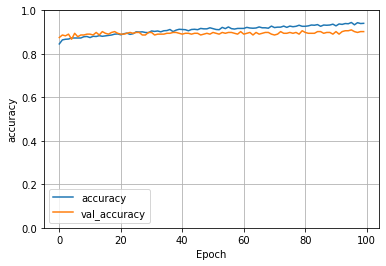

In [47]:
plot_loss(history1)

In [48]:

test_evaluation['second_model'] = second_model.evaluate(
    test_features,
    test_labels, verbose=1)
test_evaluation

10/10 [==============================] - 0s 2ms/step - loss: 0.7806 - accuracy: 0.8844


{'first_model': [0.5321780443191528, 0.859375],
 'second_model': [0.7806023359298706, 0.8843749761581421]}

As we can see, the accuracy of the model with one hidden layer improved but not significantly. Also the accuracy on test data is slightly better. But accuracy is the measure of well classified labels relative to all the labels. But as our classes are imbalanced, it is not a good measure of our model

## Precision, Recall, F1

In [49]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [50]:
second_model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=['accuracy',f1_m,precision_m, recall_m])
first_model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=['accuracy',f1_m,precision_m, recall_m])

In [51]:
%%time
history2 = second_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 7.12 s, sys: 522 ms, total: 7.64 s
Wall time: 5.85 s


In [52]:
%%time
history1 = first_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100)

CPU times: user 6 s, sys: 357 ms, total: 6.36 s
Wall time: 5.1 s


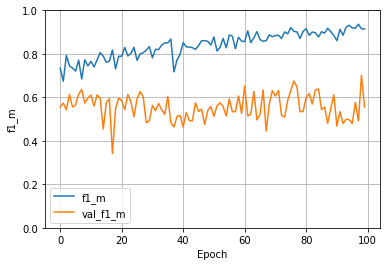

In [53]:
plot_loss(history2, measure = 'f1_m', valmeasure='val_f1_m')

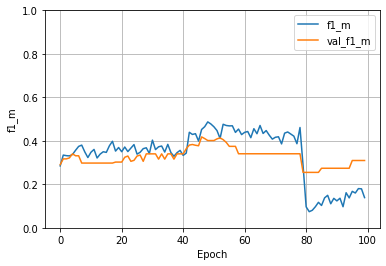

In [54]:
plot_loss(history1, measure = 'f1_m', valmeasure='val_f1_m')

In [56]:
test_evaluation['second_model_f'] = second_model.evaluate(
    test_features,
    test_labels, verbose=1)
test_evaluation['first_model_f'] = first_model.evaluate(
    test_features,
    test_labels, verbose=1)
test_evaluation

10/10 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8844 - f1_m: 0.2080 - precision_m: 0.3667 - recall_m: 0.1717        


{'first_model': [0.5321780443191528, 0.859375],
 'first_model_f': [0.44688495993614197,
  0.8843749761581421,
  0.20796534419059753,
  0.36666664481163025,
  0.17166665196418762],
 'second_model': [0.7806023359298706, 0.8843749761581421],
 'second_model_f': [0.9982237815856934,
  0.8687499761581421,
  0.3696969449520111,
  0.3766666650772095,
  0.369523823261261]}

## Conclusion - F1 score

The accuracy with one hidden layer has slightly better accuracy on test set as the base model with one neuron. But let as we look on the F1 score, which is a better score function on imbalanced classes.

### One neuron model
On train and validation set, the f1 score is very low, and even drops rapidly around 80th epoch. (why?)
On test set, the F1 score is only 0.208 which shows, that this model is no good for the classification of quality of wines.

### One hidden layer

On train set, the F1 score is increasing with increasing the number of epochs. And is approaching the ideal value. However, on validation set it oscilates between 0.6  and has no clear tendency of increasing. This fact results, that F1score on test set is only 0.367 on the test set which is higher than the first base model, but still nowhere near what we would like.

## For future
 - try to increase the number of layers
 - do further data preprocessing
 - detect outliers

